# Preliminary data analysis and visualization

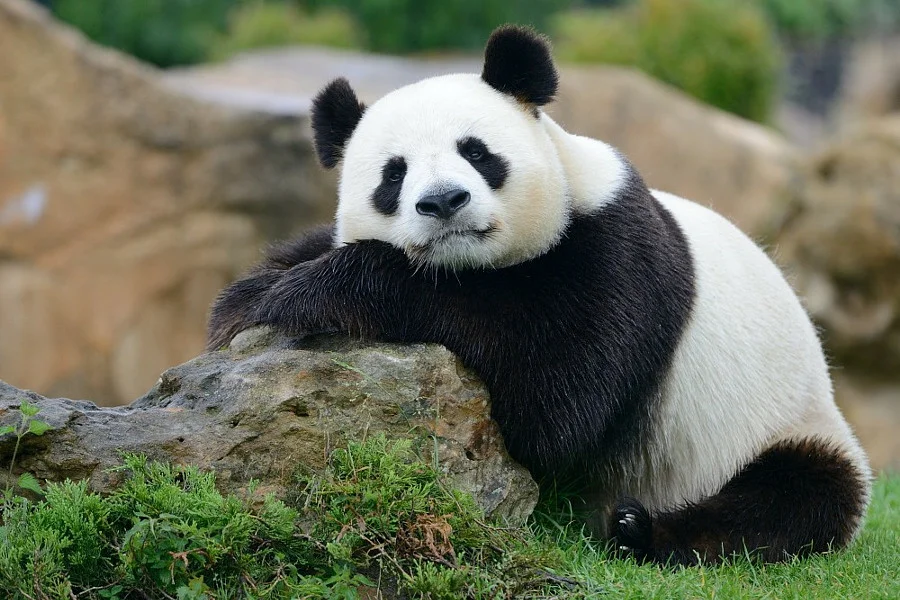

In [3]:
import pandas as pd # импортируем библиотеку пандас с сокращением 'pd'
import numpy as np # импортируем библиотеку нампай с сокращением 'np'
import seaborn as sns # импортируем библиотеку сиборн с сокращением 'sns'
import matplotlib.pyplot as plt # импортируем библиотеку матплотлиб с сокращением 'plt'

import os # импортируем библиотеку работы с ос
from collections import Counter # импортируем из библиотеки коллелкшенс - Счетчик

### Series init

In [4]:
array = ["a", "b", "c"] # создание списка
series = pd.Series(array, index=['first', 'second', 'third']) # создание "ряда"-массива средствами пандас
series # отобразить полученный массив

first     a
second    b
third     c
dtype: object

In [5]:
array2 = ['1', '2', '3'] # создание списка
series2 = pd.Series(array2) # создание массива средствами пандас с индексами по умолчанию (от 0 до n)
series2 # отобразить полученный массив

0    1
1    2
2    3
dtype: object

In [6]:
series[0], series[1], series[2] # обращение к элементу массива по индексу

('a', 'b', 'c')

In [7]:
idxs = ['first', 'second', 'third'] # создание списка индексов
series.index = idxs # изменение индексов массива series на idxs
series

first     a
second    b
third     c
dtype: object

In [11]:
idxs = ['first', 'second', 'third'] # создание списка индексов
series2.index = idxs # изменение индексов массива series на idxs
series2

first     1
second    2
third     3
dtype: object

In [12]:
series[0], series[1], series[2] # но обращение по индексу как в списках сохраняется

('a', 'b', 'c')

In [13]:
series['first'], series['second'], series['third'] # добавляется обращение по "ключу"

('a', 'b', 'c')

In [10]:
dc = dict(zip(['first', 'second', 'second'], series)) # таким образом массив можно конвертировать в словарь, если указать свои ключи
dc

{'first': 'a', 'second': 'c'}

In [15]:
dc = dict(series2) # таким образом массив можно конвертировать в словарь
dc

{'first': '1', 'second': '2', 'third': '3'}

In [16]:
series['first'], series['second'], series['third']

('a', 'b', 'c')

In [17]:
series = series.sort_values(ascending=False) # сортировка и пересохранение массива (ascending - возрастание) по убыванию

In [20]:
series[0], series[1], series[2] # обращение по индексу сохранилось, но значения в этих индексах поменялись

('c', 'b', 'a')

In [21]:
series

third     c
second    b
first     a
dtype: object

In [28]:
series['first'], series['second'], series['third'] # а обращение по ключу возвращает задуманное значение

('a', 'b', 'c')

In [36]:
series.index.values # объект типа массив

array(['third', 'second', 'first'], dtype=object)

In [29]:
type(series.index.values)

numpy.ndarray

In [35]:
type(series.values), series.values # при этом сохраняется тип данных массив

(numpy.ndarray, array(['c', 'b', 'a'], dtype=object))

In [37]:
series.index # объект типа индекс

Index(['third', 'second', 'first'], dtype='object')

In [27]:
type(series.index)

pandas.core.indexes.base.Index

In [26]:
series.values

array(['c', 'b', 'a'], dtype=object)

In [28]:
type(series.values)

numpy.ndarray

### DataFrame init

In [38]:
df = pd.DataFrame(
    zip([1,2,3], [10, 20, 30], [100, 200, 300]), 
    columns=['col1', 'col2', 'col3'], 
    index=['a', 'b', 'c']) # создание "таблицы" распаковав три списка, с колонками и индексами указанными в параметрах
df

,col1,col2,col3
a,1,10,100
b,2,20,200
c,3,30,300


In [39]:
df.iloc[0] # отображение 0й строки

col1      1
col2     10
col3    100
Name: a, dtype: int64

In [29]:
df.index, df.columns # отображение списка индексов и списка с названием колонок

(Index(['a', 'b', 'c'], dtype='object'),
 Index(['col1', 'col2', 'col3'], dtype='object'))

In [43]:
df['col1'] # отображение столбца по имени

a    1
b    2
c    3
Name: col1, dtype: int64

In [45]:
df.col1 # или так

a    1
b    2
c    3
Name: col1, dtype: int64

In [46]:
type(df['col1']), df['col1'].index # отобразить тип колонки (это серия 'одномерный массив' или вектор) и отобразить индексы выбранной колонки

(pandas.core.series.Series, Index(['a', 'b', 'c'], dtype='object'))

In [49]:
dict(df) # создание словаря из типа датафрейим, как видно, массив хранит в себе не только значение, но и тип данных, индексы и название колонок

{'col1': a    1
 b    2
 c    3
 Name: col1, dtype: int64,
 'col2': a    10
 b    20
 c    30
 Name: col2, dtype: int64,
 'col3': a    100
 b    200
 c    300
 Name: col3, dtype: int64}

In [50]:
df_dict = dict(zip(['col1', 'col2', 'col3'], [[1,2,3], [10, 20, 30], [100, 200, 300]])) # создание словаря
df_dict

{'col1': [1, 2, 3], 'col2': [10, 20, 30], 'col3': [100, 200, 300]}

In [40]:
df = pd.DataFrame(
    df_dict, 
    index=['a', 'b', 'c']) # Создание датафрейма (таблицы) из словаря
df

,col1,col2,col3
a,1,10,100
b,2,20,200
c,3,30,300


In [51]:
df[df.columns[::-1]] # изменение порядка колонок

,col3,col2,col1
a,100,10,1
b,200,20,2
c,300,30,3


In [52]:
type(df[['col1', 'col3']]) # отображение типа нескольких колонок

pandas.core.frame.DataFrame

### working with files

In [54]:
path = os.path.join('data', 'bank_marketing', 'bank.csv') # объединение названия папок и файла в строку с адресом этом файле в компьютере
df = pd.read_csv(path) # чтение и создание из csv файла датафрейма
df.columns # отображение колонок датафрейма

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [57]:
path

'data\\bank_marketing\\bank.csv'

In [58]:
df[:3] # отображение первых трех строк таблицы

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [62]:
df.head(3) # еще один способ отображения первых трех строк таблицы

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [64]:
df.to_csv(os.path.join('data', 'bank_marketing','bank_new.csv')) # сохранение таблицы в файл на компьютере

### data overview

#### личные данные:
1 - Возраст  
2 - Работа ("администратор", "неизвестный", "безработный", "менеджмент", "горничная", "предприниматель", "студент",
"синий воротничок", "самозанятый", "пенсионер", "техник", " услуги")  
3 - Cемейное положение ("женат", "разведен", "холост")  
4 - Образование ("неизвестное", "среднее", "начальное", " высшее")  
5 - Дефолт: есть ли кредит в дефолте? ("да", " нет")  
6 - Баланс: среднегодовой баланс, в евро  
7 - Жилье: есть ли жилищный кредит? ("да", " нет")  
8 - Кредит: есть ли личный кредит? ("да", " нет")  

#### последние контакты в рамках текущей кампании:  
9 - Контакт: тип контактной связи (категориальный: "неизвестный", "телефон", " сотовая связь")  
10 - День: последний контактный день месяца  
11 - Месяц: Последний контактный месяц года ("январь", "февраль"," март",..., "ноябрь", " декабрь")  
12 - Длительность: длительность последнего контакта в секундах  

#### прочие атрибуты:
13 - Кампания: количество контактов, выполненных во время этой кампании и для данного клиента (числовое, включает последний контакт)  
14 - pdays: количество дней, прошедших после того, как с клиентом в последний раз связывались из предыдущей кампании (числовое значение, -1 означает, что с клиентом ранее не связывались)  
15 - previous: количество контактов, выполненных до этой кампании и для данного клиента  
16 - poutcome: результат предыдущей маркетинговой кампании ("неизвестный", "другой", "неудача", " успех")  

In [67]:
df.shape # отображение размерности таблицы (4521 - строк, 17 стодбцов)

(4521, 17)

In [14]:
df[:5] # отображение первых пяти строк с помощью среза

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [68]:
df[:10] # отображение первых десяти строк с помощью среза

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [70]:
df.info() # вывод общей информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [71]:
df.describe() # обзор основных статистик по таблице

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [72]:
df['age'].argmin() # вывод индекса минимальной строки по колонке age

503

In [74]:
df['age'].min() # вывод значения минимальной строки по колонке age

19

In [77]:
df.iloc[df['age'].argmin()]

age                19
job           student
marital        single
education     primary
default            no
balance           103
housing            no
loan               no
contact      cellular
day                10
month             jul
duration          104
campaign            2
pdays              -1
previous            0
poutcome      unknown
y                 yes
Name: 503, dtype: object

In [135]:
df.loc[df['age'].argmin()]

age                19
job           student
marital        single
education     primary
default            no
balance           103
housing            no
loan               no
contact      cellular
day                10
month             jul
duration          104
campaign            2
pdays              -1
previous            0
poutcome      unknown
y                 yes
Name: 503, dtype: object

In [75]:
df['balance'].argmin()  # вывод индекса минимальной строки по колонке balance

4517

In [76]:
df.balance.min() # вывод значения минимальной строки по колонке balance

-3313

In [17]:
df.iloc[df['balance'].argmin()] # отображение информации о строке по минимальной колонке balance

age                     57
job          self-employed
marital            married
education         tertiary
default                yes
balance              -3313
housing                yes
loan                   yes
contact            unknown
day                      9
month                  may
duration               153
campaign                 1
pdays                   -1
previous                 0
poutcome           unknown
y                       no
Name: 4517, dtype: object

In [79]:
df.corr() # вычисление коэффициента корреляции (зависимость между фичами)

C:\Users\NIIIS\AppData\Local\Temp\ipykernel_12192\68282881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # вычисление коэффициента корреляции (звисимость между фичами)


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


#### heatmap

C:\Users\NIIIS\AppData\Local\Temp\ipykernel_12192\2638250970.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) # строим "карту температур" по коэффициентам корреляции


<AxesSubplot: >

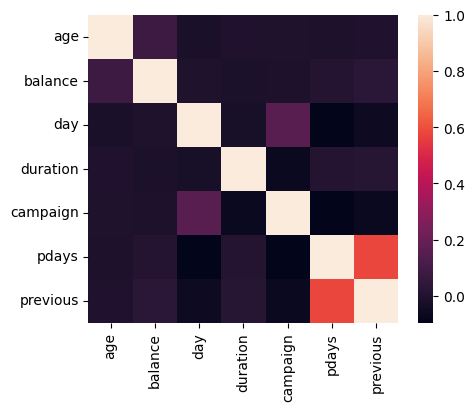

In [105]:
plt.figure(figsize=(5,4), dpi=100) # изображение 5х4 дюйма с плотностью пикселей на дюйм равным 100
sns.heatmap(df.corr()) # строим "карту температур" по коэффициентам корреляции

In [110]:
df[['pdays', 'previous']] # таблица из столбцов датафрейма

,pdays,previous
0,-1,0
1,339,4
2,330,1
3,-1,0
4,-1,0
...,...,...
4516,-1,0
4517,-1,0
4518,-1,0
4519,211,3


In [111]:
df[['pdays', 'previous']].values # матрица значений из столбцов датафрейма

array([[ -1,   0],
       [339,   4],
       [330,   1],
       ...,
       [ -1,   0],
       [211,   3],
       [249,   7]], dtype=int64)

In [112]:
df[['pdays', 'previous']].values.T # транспонирование матрцы значений из столбцов таблицы

array([[ -1, 339, 330, ...,  -1, 211, 249],
       [  0,   4,   1, ...,   0,   3,   7]], dtype=int64)

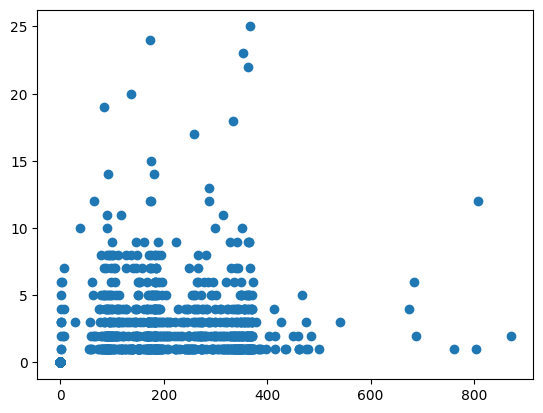

In [137]:
plt.scatter(*(df[['pdays', 'previous']].values.T)) # строим диаграмму рассеяния по столбцам 'pdays' и 'previous' предварительно транспонировав значения

In [122]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [127]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [139]:
df.apply(lambda x: len(set(x)), axis=0) # применение лямбда-функции (число уникальных значений) к столбцу

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [119]:
df.apply(lambda x: len(set(x)), axis=0)[df.dtypes == object] # применение лябмда-функции только к строкам тип данных который - это 'объект'

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

### sorting

In [130]:
df.sort_values(['balance'], ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,jun,174,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,46,blue-collar,married,secondary,no,-1400,yes,no,telephone,6,may,309,3,355,4,failure,no
856,49,technician,married,secondary,yes,-1680,yes,yes,unknown,27,jun,92,4,-1,0,unknown,no
2538,44,management,married,secondary,no,-1746,yes,no,unknown,20,jun,218,1,-1,0,unknown,no
2398,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,no


In [131]:
df.sort_values(['balance', 'age'], ascending=False) # сортировка таблицы по столбцам баланс и возраст, по убыванию

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,jun,174,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,46,blue-collar,married,secondary,no,-1400,yes,no,telephone,6,may,309,3,355,4,failure,no
856,49,technician,married,secondary,yes,-1680,yes,yes,unknown,27,jun,92,4,-1,0,unknown,no
2538,44,management,married,secondary,no,-1746,yes,no,unknown,20,jun,218,1,-1,0,unknown,no
2398,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,no


### grouping

In [141]:
Counter(df['job']), df['job'].value_counts() # подсчет значений по столбцам двумя способами

(Counter({'unemployed': 128,
          'services': 417,
          'management': 969,
          'blue-collar': 946,
          'self-employed': 183,
          'technician': 768,
          'entrepreneur': 168,
          'admin.': 478,
          'student': 84,
          'housemaid': 112,
          'retired': 230,
          'unknown': 38}),
 management       969
 blue-collar      946
 technician       768
 admin.           478
 services         417
 retired          230
 self-employed    183
 entrepreneur     168
 unemployed       128
 housemaid        112
 student           84
 unknown           38
 Name: job, dtype: int64)

In [143]:
df.groupby(['job', 'age'])['balance'].agg(['mean', 'std']) # создание сводной таблицы из столбцов job, age, balance, с выводом основных статистик (среднее, ст. откл) по столбцу balance

mean          std
job     age                          
admin.  22   4111.000000          NaN
        23    297.000000   412.950360
        24    612.500000   443.355952
        25   1163.428571  1586.067554
        26   1175.692308  1404.114512
...                  ...          ...
unknown 59   3940.000000          NaN
        60   7337.000000          NaN
        62    367.000000          NaN
        65   2508.500000  3123.290653
        71    353.000000          NaN

[451 rows x 2 columns]

In [144]:
df.groupby('y')['job'].value_counts() # объединяем таблицу по 'y', отображаем 'job', с указанием кол-во значений

y    job          
no   blue-collar      877
     management       838
     technician       685
     admin.           420
     services         379
     retired          176
     self-employed    163
     entrepreneur     153
     unemployed       115
     housemaid         98
     student           65
     unknown           31
yes  management       131
     technician        83
     blue-collar       69
     admin.            58
     retired           54
     services          38
     self-employed     20
     student           19
     entrepreneur      15
     housemaid         14
     unemployed        13
     unknown            7
Name: job, dtype: int64

#### countplot

In [157]:
df.apply(lambda x: len(set(x)), axis=0)[df.dtypes == object]

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [156]:
df.astype('object')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [159]:
sum(df.dtypes == object)

10

In [196]:
df.columns[df.dtypes == 'object'][:-1]

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [172]:
df.groupby('y')['job'].value_counts()

y    job          
no   blue-collar      877
     management       838
     technician       685
     admin.           420
     services         379
     retired          176
     self-employed    163
     entrepreneur     153
     unemployed       115
     housemaid         98
     student           65
     unknown           31
yes  management       131
     technician        83
     blue-collar       69
     admin.            58
     retired           54
     services          38
     self-employed     20
     student           19
     entrepreneur      15
     housemaid         14
     unemployed        13
     unknown            7
Name: job, dtype: int64

In [168]:
df.groupby('y')['job'].value_counts(normalize=True)

y    job          
no   blue-collar      0.219250
     management       0.209500
     technician       0.171250
     admin.           0.105000
     services         0.094750
     retired          0.044000
     self-employed    0.040750
     entrepreneur     0.038250
     unemployed       0.028750
     housemaid        0.024500
     student          0.016250
     unknown          0.007750
yes  management       0.251440
     technician       0.159309
     blue-collar      0.132438
     admin.           0.111324
     retired          0.103647
     services         0.072937
     self-employed    0.038388
     student          0.036468
     entrepreneur     0.028791
     housemaid        0.026871
     unemployed       0.024952
     unknown          0.013436
Name: job, dtype: float64

In [173]:
df.groupby('y')['job'].value_counts(normalize=True).rename('proportion')

y    job          
no   blue-collar      0.219250
     management       0.209500
     technician       0.171250
     admin.           0.105000
     services         0.094750
     retired          0.044000
     self-employed    0.040750
     entrepreneur     0.038250
     unemployed       0.028750
     housemaid        0.024500
     student          0.016250
     unknown          0.007750
yes  management       0.251440
     technician       0.159309
     blue-collar      0.132438
     admin.           0.111324
     retired          0.103647
     services         0.072937
     self-employed    0.038388
     student          0.036468
     entrepreneur     0.028791
     housemaid        0.026871
     unemployed       0.024952
     unknown          0.013436
Name: proportion, dtype: float64

In [177]:
df.groupby('y')['job'].value_counts(normalize=True).rename('proportion').reset_index()

,y,job,proportion
0,no,blue-collar,0.219250
1,no,management,0.209500
2,no,technician,0.171250
3,no,admin.,0.105000
4,no,services,0.094750
5,no,retired,0.044000
6,no,self-employed,0.040750
7,no,entrepreneur,0.038250
8,no,unemployed,0.028750
9,no,housemaid,0.024500


In [178]:
df.groupby('y')['marital'].value_counts(normalize=True).rename('proportion').reset_index()

,y,marital,proportion
0,no,married,0.630000
1,no,single,0.257250
2,no,divorced,0.112750
3,yes,married,0.531670
4,yes,single,0.320537
5,yes,divorced,0.147793


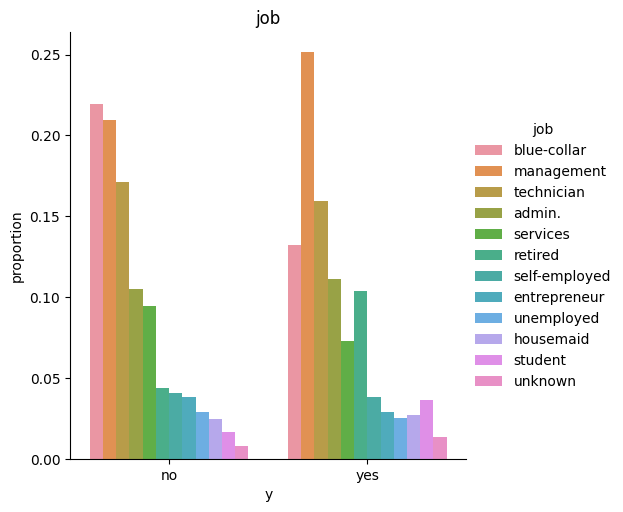

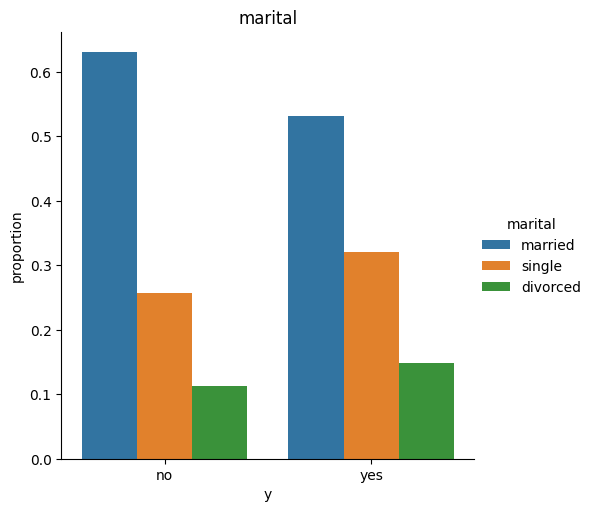

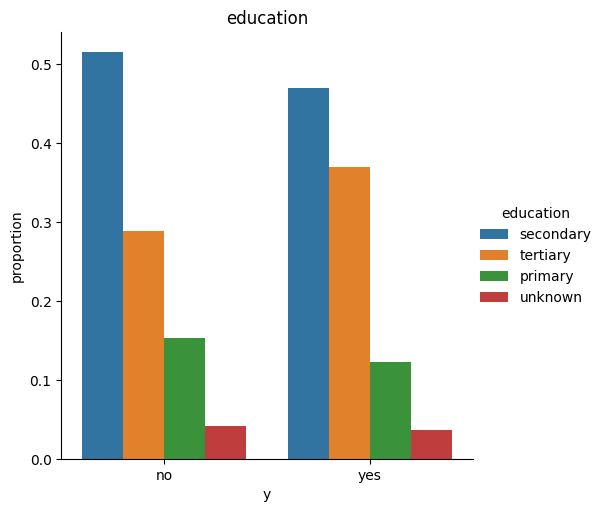

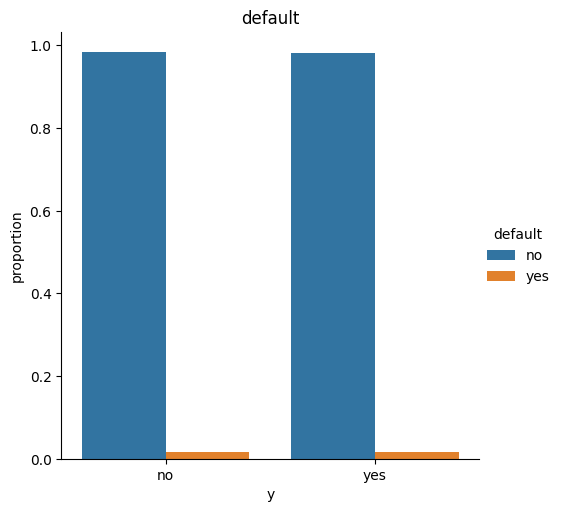

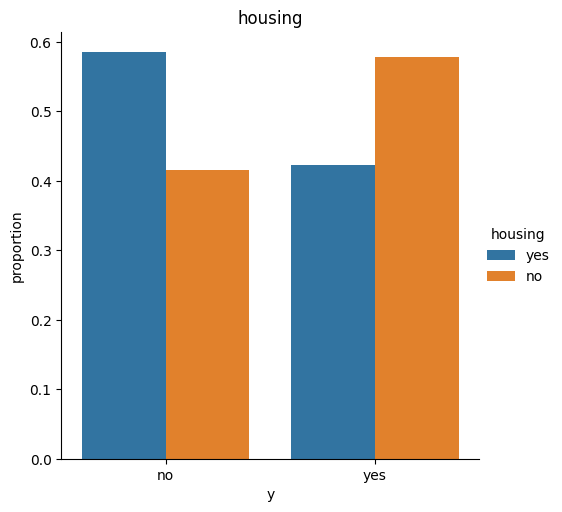

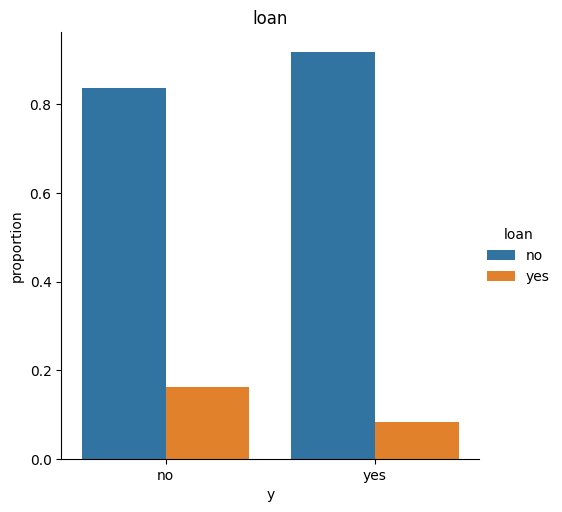

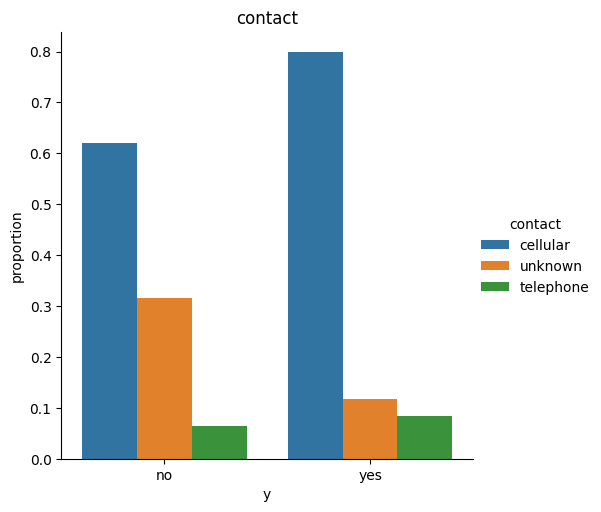

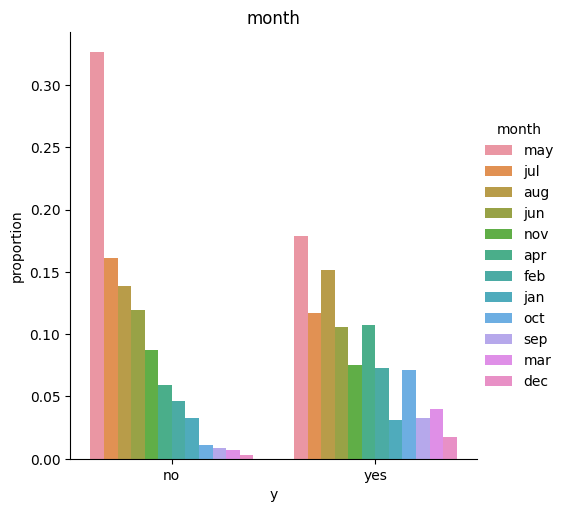

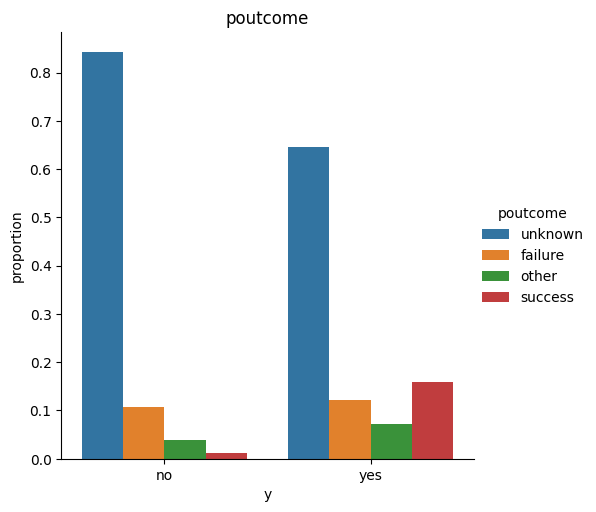

In [187]:
count = int(sum(df.dtypes == object) / 2) # полусумма векторов равных типу объект
for i, col_name in enumerate(df.columns[df.dtypes == object][:-1]): # цикл по столбцам
    freq_data = df.groupby('y')[col_name].value_counts(normalize=True).rename('proportion').reset_index()
    # строим гистограмму по столбцу y и по каждому столбцу в цикле
    sns.catplot(x='y', y='proportion', hue=col_name, kind='bar', data=freq_data,)
    plt.title(col_name)
    plt.show()

In [188]:
df_curr = df.groupby('job')[['age', 'balance']].agg(['mean', 'std', 'median'])

In [190]:
df.agg('mean')

C:\Users\NIIIS\AppData\Local\Temp\ipykernel_12192\394872364.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.agg('mean')


age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64

In [191]:
df.mean()

C:\Users\NIIIS\AppData\Local\Temp\ipykernel_12192\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64

In [189]:
df_curr # создание таблицы объеденной по job с указанием age и balance, а также основных статистик

age                        balance                    
                    mean        std median         mean          std median
job                                                                        
admin.         39.682008   9.442496   38.0  1226.736402  2370.119128  430.0
blue-collar    40.156448   9.038123   39.0  1085.161734  2040.218220  408.5
entrepreneur   42.011905   8.357999   41.0  1645.125000  4441.303620  365.5
housemaid      47.339286  11.008231   49.0  2083.803571  4603.836647  296.5
management     40.540764   9.192424   38.0  1766.928793  3267.733077  577.0
retired        61.869565   9.789507   59.0  2319.191304  5846.379889  672.5
self-employed  41.453552   9.406964   40.0  1392.409836  2479.640999  483.0
services       38.570743   9.207825   37.0  1103.956835  2445.239976  288.0
student        26.821429   5.282754   26.0  1543.821429  2579.886671  422.5
technician     39.470052   8.671561   38.0  1330.996094  2630.253390  434.5
unemployed     40.906250   9.765307   41.0  1089.421875  1692.267628  473.5
unknown        48.105263  10.399557   49.5  1501.710526  1957.258258  655.5

In [48]:
df_curr.loc['unknown'] # отдельно данные по строке-специальности 'unknown'

age      mean        48.105263
         std         10.399557
         median      49.500000
balance  mean      1501.710526
         std       1957.258258
         median     655.500000
Name: unknown, dtype: float64

### selection

In [156]:
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [160]:
np.random.permutation(df_curr.index)

array([ 637, 1717, 1028, ..., 1092, 1810, 1196], dtype=int64)

In [194]:
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [195]:
df_curr = df.copy()
np.random.seed(42)
df_curr['new_index'] = np.random.permutation(df_curr.index)
df_curr = df_curr.set_index('new_index')
df_curr[:3]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
new_index,,,,,,,,,,,,,,,,,
2398,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
800,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2288,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [205]:
df[-10:].reset_index(drop=True)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
1,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
2,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
3,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
5,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
6,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
8,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
9,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [206]:
df_curr.loc[2398] # Обращение к строке по индексу

age                  30
job          unemployed
marital         married
education       primary
default              no
balance            1787
housing              no
loan                 no
contact        cellular
day                  19
month               oct
duration             79
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 2398, dtype: object

In [207]:
type(df_curr.loc[2398])

pandas.core.series.Series

In [208]:
df['job'] == 'retired'

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Name: job, Length: 4521, dtype: bool

In [209]:
(df['job'] == 'retired') & (df['marital'] == 'married')

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [214]:
df[(df['job'] == 'retired') & (df['marital'] == 'married')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27,67,retired,married,unknown,no,696,no,no,telephone,17,aug,119,1,105,2,failure,no
61,63,retired,married,secondary,no,415,yes,no,cellular,7,oct,323,1,-1,0,unknown,no
74,56,retired,married,secondary,no,344,yes,no,unknown,15,may,221,1,-1,0,unknown,no
81,60,retired,married,primary,no,5,no,no,cellular,26,aug,63,2,-1,0,unknown,no
146,56,retired,married,primary,no,1906,no,yes,unknown,19,jun,45,9,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,60,retired,married,tertiary,no,225,no,no,cellular,19,aug,54,2,-1,0,unknown,no
4366,59,retired,married,secondary,no,0,no,no,unknown,5,jun,812,1,-1,0,unknown,yes
4398,57,retired,married,tertiary,no,31,no,no,cellular,19,aug,260,2,-1,0,unknown,no
4409,57,retired,married,secondary,no,107,no,no,cellular,14,jul,85,2,-1,0,unknown,no


#### histogramm

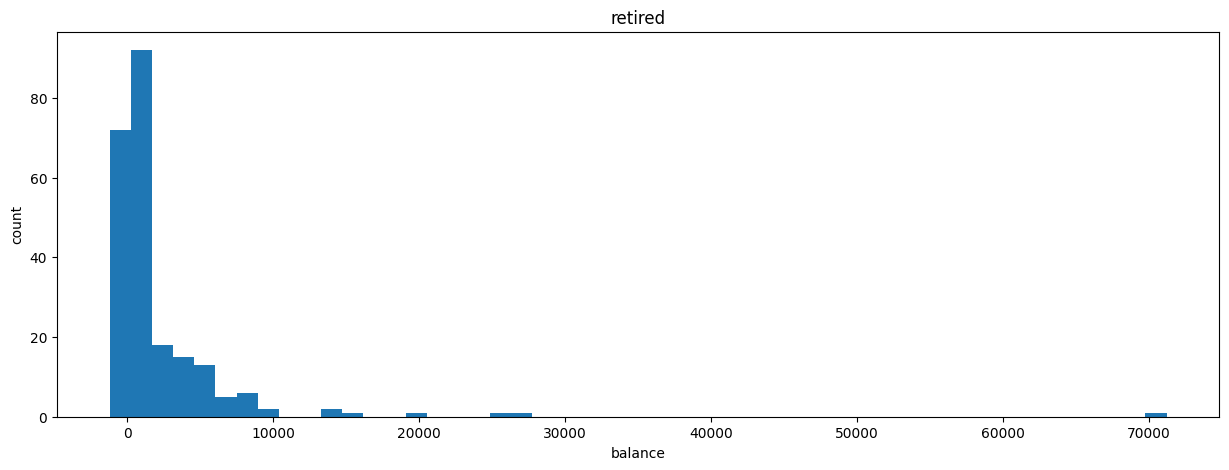

In [215]:
plt.figure(figsize=(15,5))
plt.hist(df[df['job'] == 'retired']['balance'].values, bins=50)
plt.xlabel('balance')
plt.ylabel('count')
plt.title('retired')
plt.show()

In [216]:
df[df['job'] == 'retired'][df[df['job'] == 'retired']['balance'].values > np.percentile(df[df['job'] == 'retired']['balance'].values, 99)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1031,49,retired,single,primary,no,25824,no,no,unknown,17,jun,94,1,-1,0,unknown,no
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
4047,75,retired,married,secondary,no,26452,no,no,telephone,15,jul,219,2,-1,0,unknown,no


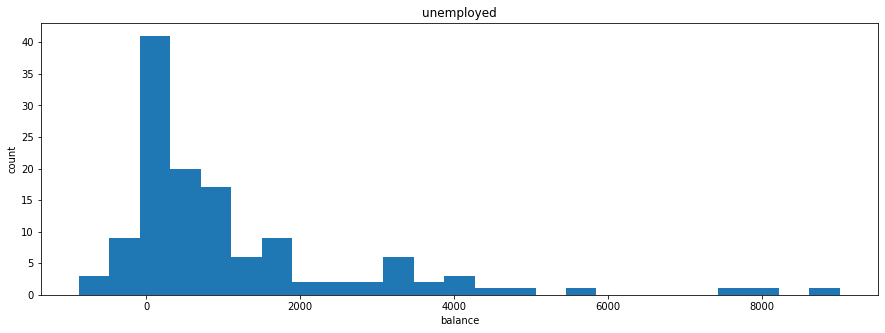

In [91]:
plt.figure(figsize=(15,5))
plt.hist(df[df['job'] == 'unemployed']['balance'].values, bins=25)
plt.xlabel('balance')
plt.ylabel('count')
plt.title('unemployed')
plt.show()

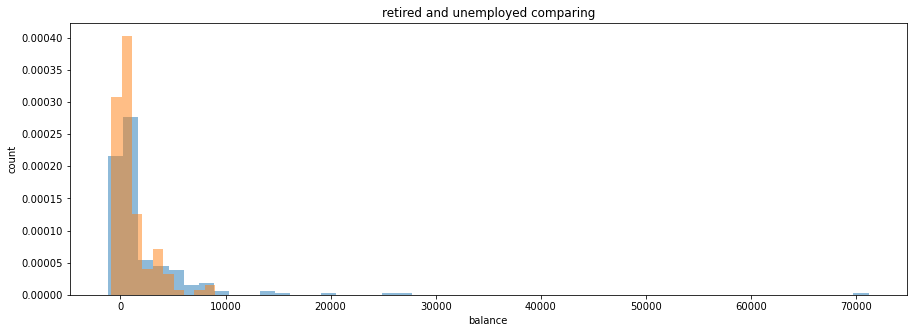

In [52]:
plt.figure(figsize=(15,5))
plt.hist(df[df['job'] == 'retired']['balance'].values, density=True,  histtype='barstacked', bins=50, alpha=0.5)
plt.hist(df[df['job'] == 'unemployed']['balance'].values, density=True, histtype='barstacked', alpha=0.5)
plt.xlabel('balance')
plt.ylabel('count')
plt.title('retired and unemployed comparing')
plt.show()

#### boxplot

<AxesSubplot:xlabel='job', ylabel='balance'>

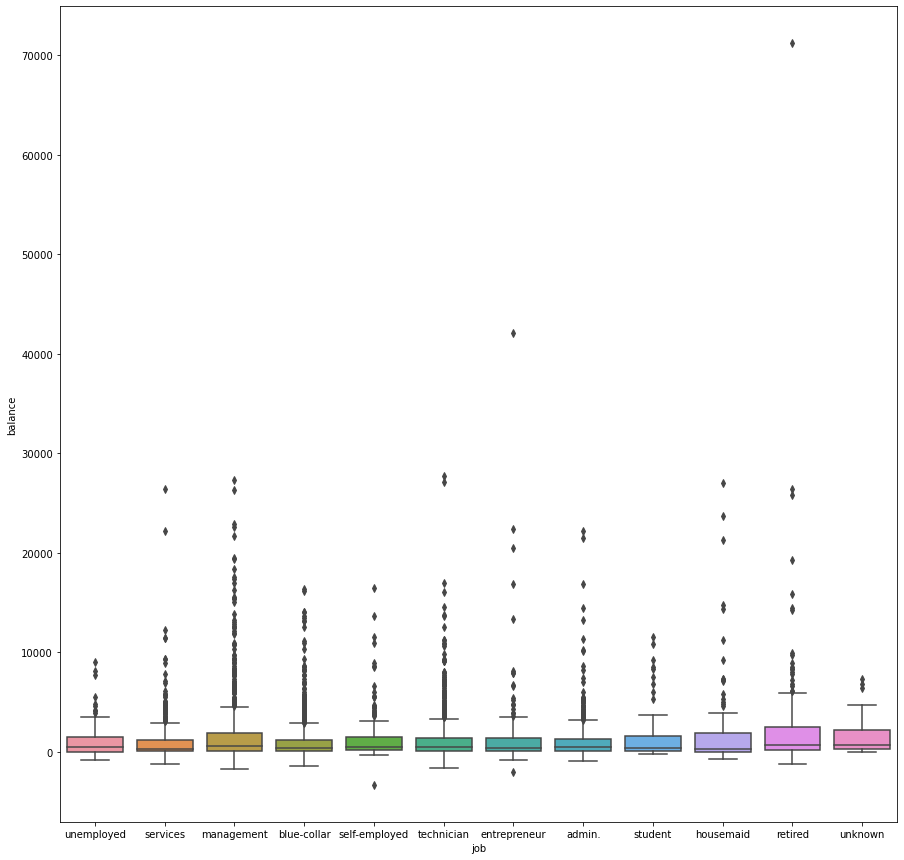

In [105]:
plt.figure(figsize=(15,15))
sns.boxplot(x='job',y='balance', data=df)

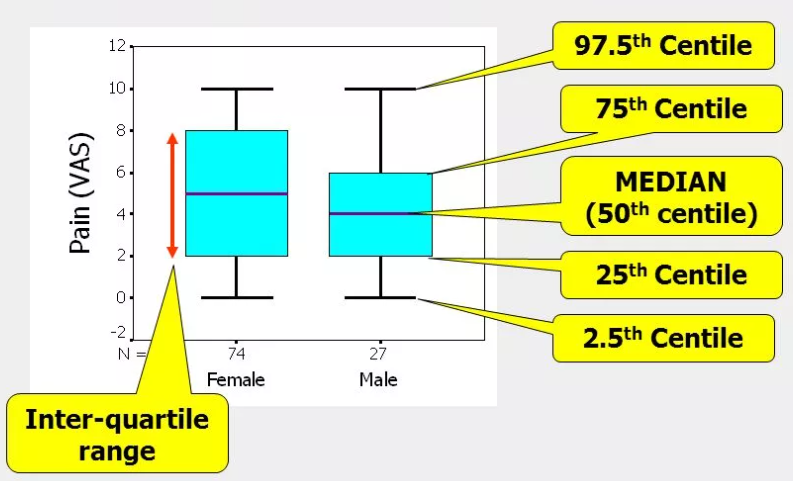

In [112]:
df[df['balance'] < np.percentile(df[]['balance'].values, 10)].shape

(366, 17)

<AxesSubplot:xlabel='job', ylabel='balance'>

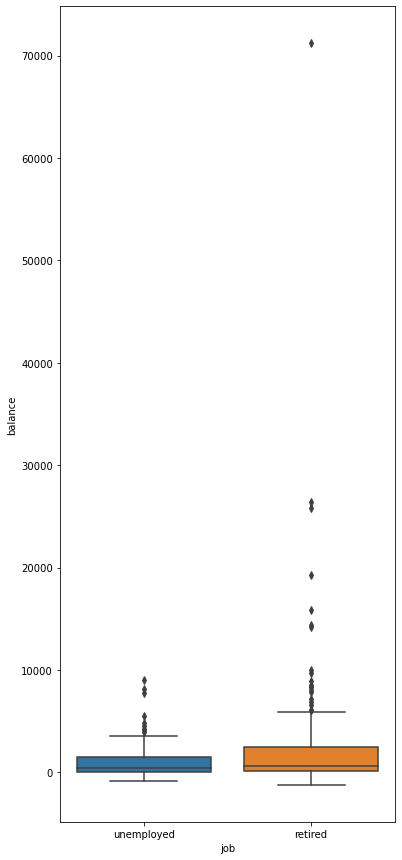

In [90]:
plt.figure(figsize=(6,15))
sns.boxplot(x='job',y='balance', data=df[df['job'].isin(['retired', 'unemployed'])])

In [114]:
np.percentile(df[df['job'] == 'retired']['balance'].values, 97.5)

14272.800000000001

#### pairplot

In [116]:
Counter(df['y'])

Counter({'no': 4000, 'yes': 521})

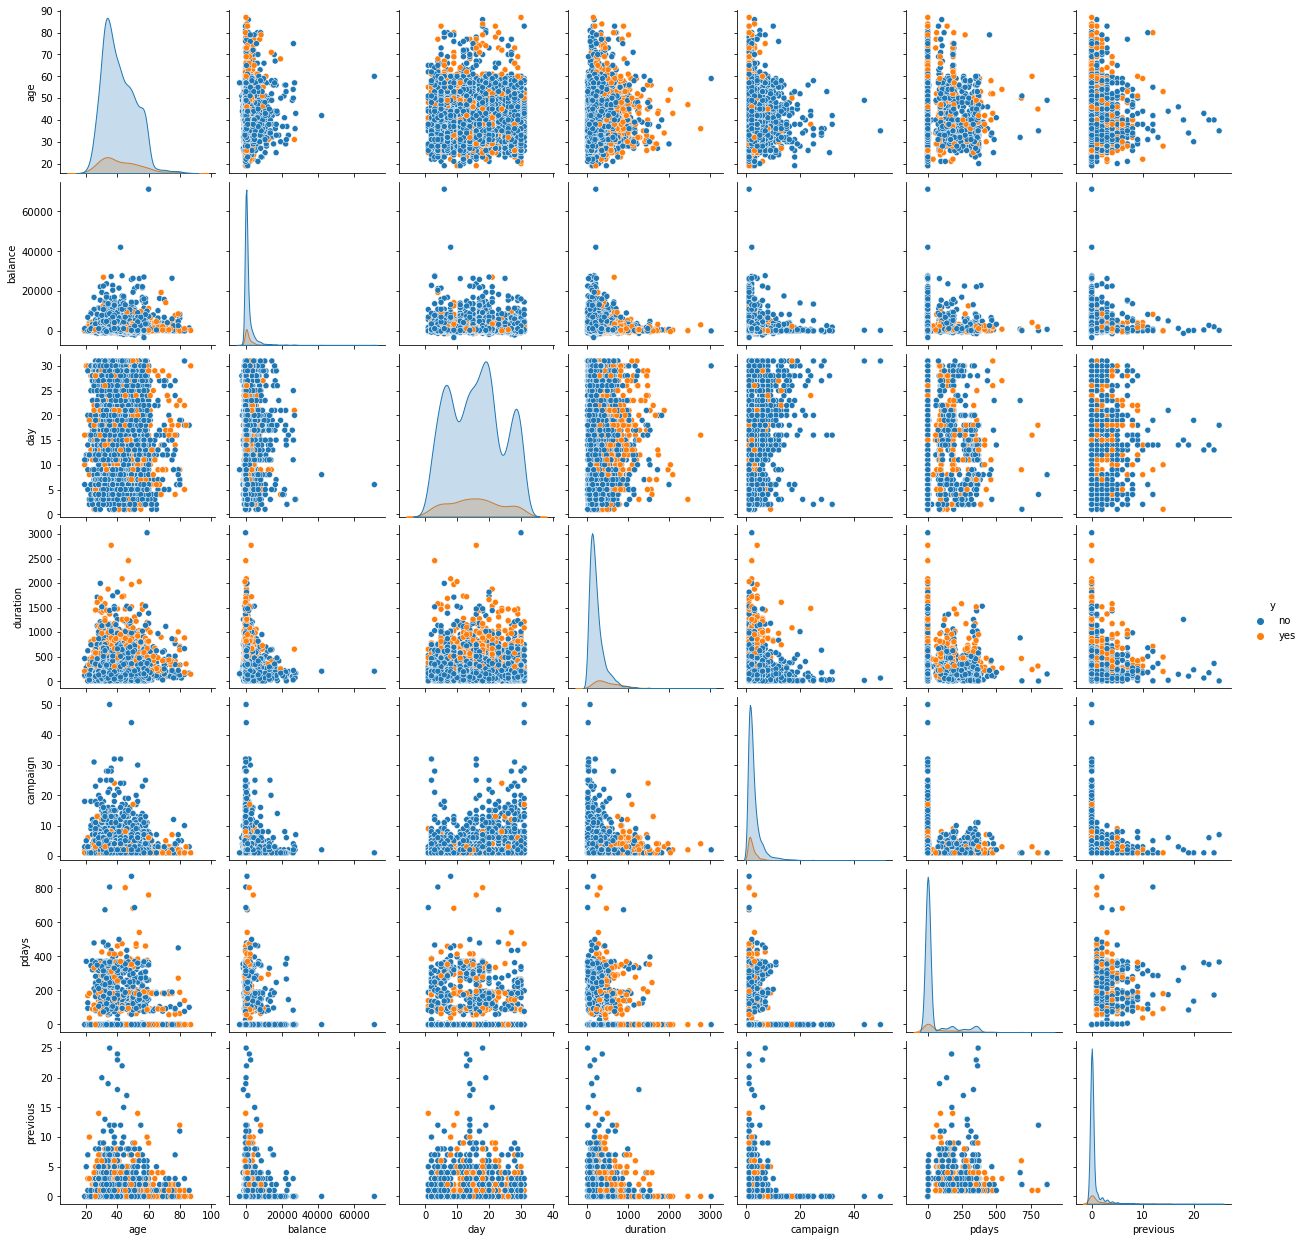

In [91]:
sns.pairplot(data=df[list(df.columns[df.dtypes != object]) + ['y']], hue='y',);

### reshaping

In [127]:
df_curr = df[['education', 'job', 'balance']].groupby(['education', 'job'])['balance'].median()
df_curr

education  job          
primary    admin.            179.0
           blue-collar       419.0
           entrepreneur      187.5
           housemaid         212.0
           management       1727.0
           retired           687.0
           self-employed     362.0
           services          228.0
           student          1787.5
           technician        260.0
           unemployed        330.5
           unknown           341.0
secondary  admin.            424.0
           blue-collar       395.5
           entrepreneur      475.0
           housemaid         382.0
           management        384.5
           retired           610.0
           self-employed     359.0
           services          259.0
           student           502.0
           technician        347.5
           unemployed        496.5
           unknown          1035.5
tertiary   admin.            621.0
           blue-collar      1624.5
           entrepreneur      475.0
           housemaid         4

In [129]:
df_curr.unstack()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,179.0,419.0,187.5,212.0,1727.0,687.0,362.0,228.0,1787.5,260.0,330.5,341.0
secondary,424.0,395.5,475.0,382.0,384.5,610.0,359.0,259.0,502.0,347.5,496.5,1035.5
tertiary,621.0,1624.5,475.0,451.5,581.0,478.0,589.0,387.5,118.0,629.0,434.5,1752.0
unknown,1088.0,191.0,98.0,0.0,787.0,696.0,7.0,1877.0,467.5,596.5,3919.5,677.0


In [130]:
df_curr.unstack().T

education,primary,secondary,tertiary,unknown
job,,,,
admin.,179.0,424.0,621.0,1088.0
blue-collar,419.0,395.5,1624.5,191.0
entrepreneur,187.5,475.0,475.0,98.0
housemaid,212.0,382.0,451.5,0.0
management,1727.0,384.5,581.0,787.0
retired,687.0,610.0,478.0,696.0
self-employed,362.0,359.0,589.0,7.0
services,228.0,259.0,387.5,1877.0
student,1787.5,502.0,118.0,467.5


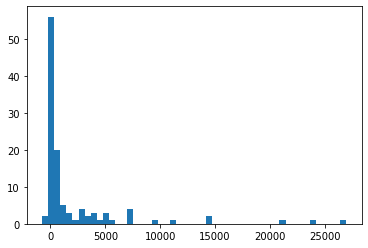

In [136]:
plt.hist(df[df['job']=='housemaid']['balance'], bins=50);

<AxesSubplot:xlabel='education', ylabel='job'>

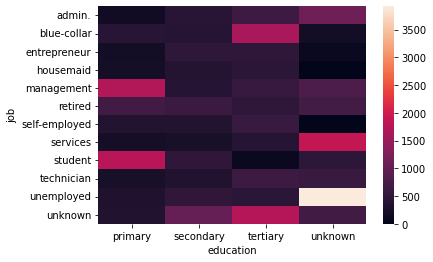

In [131]:
sns.heatmap(df_curr.unstack().T)

<AxesSubplot:xlabel='education', ylabel='job'>

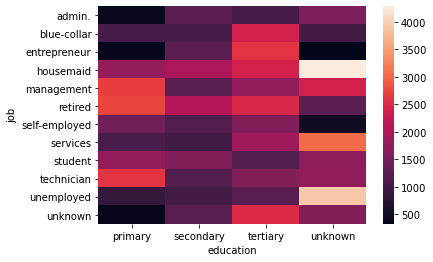

In [62]:
sns.heatmap(df_curr.unstack().T)

In [145]:
df_curr = df[['education', 'y', 'balance']].groupby(['education', 'y'])['balance'].mean()
df_curr.unstack()

y,no,yes
education,,
primary,1356.364821,1940.921875
secondary,1184.244056,1302.559184
tertiary,1785.972342,1712.186528
unknown,1624.654762,2378.473684


### selection and setting

In [137]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [175]:
df_curr = df.copy()
df_curr.loc[df['default']=='no', 'default'] = 0
df_curr.loc[df['default']=='yes', 'default'] = 1

df_curr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,0,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,0,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [179]:
set(df['default']), Counter(df['default']), set(df_curr['default']), Counter(df_curr['default']) 

({'no', 'yes'},
 Counter({'no': 4445, 'yes': 76}),
 {0, 1},
 Counter({0: 4445, 1: 76}))

### getting uniq

In [182]:
df['job'].drop_duplicates(), set(df['job'])

(0        unemployed
 1          services
 2        management
 4       blue-collar
 6     self-employed
 7        technician
 8      entrepreneur
 11           admin.
 13          student
 24        housemaid
 27          retired
 95          unknown
 Name: job, dtype: object,
 {'admin.',
  'blue-collar',
  'entrepreneur',
  'housemaid',
  'management',
  'retired',
  'self-employed',
  'services',
  'student',
  'technician',
  'unemployed',
  'unknown'})

### adding rows and columns

In [183]:
curr_df = df.copy()
curr_df['balance2'] = curr_df['balance']**2
df.columns, curr_df.columns 

(Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y', 'balance2'],
       dtype='object'))

In [185]:
curr_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance2
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,3193369
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,22934521
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1822500
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,2178576
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [188]:
df.iloc[0]

age                  30
job          unemployed
marital         married
education       primary
default              no
balance            1787
housing              no
loan                 no
contact        cellular
day                  19
month               oct
duration             79
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 0, dtype: object

In [197]:
curr_df = df.copy()[:10]
curr_df = curr_df.append(df.iloc[0])
curr_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [202]:
curr_df = df.copy()
curr_df.drop(columns = ['job'])

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [204]:
curr_df = df.copy()
curr_df.drop([0])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [63]:
curr_df = df.copy()
curr_df.drop(df[df['age']==30].index)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


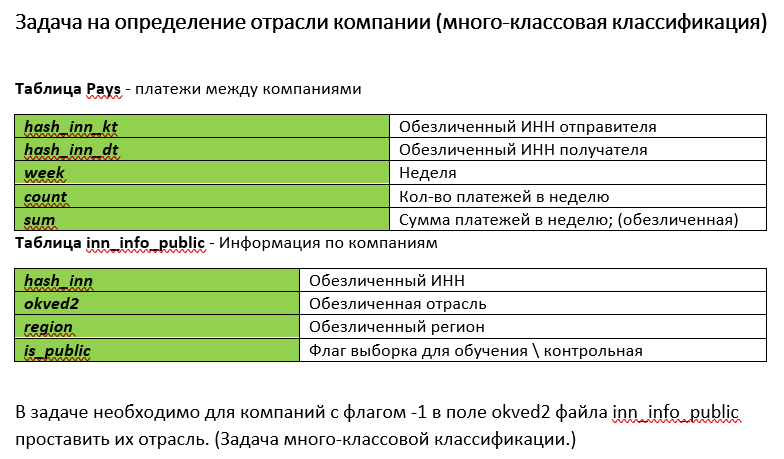

In [159]:
inns_df = pd.read_csv(os.path.join('data', 'sberbank', 'inn_info_public.csv'))
pays_df = pd.read_csv(os.path.join('data', 'sberbank', 'pays.csv'))

In [164]:
pays_df = pays_df.fillna(0)
pays_df.isna().sum()

hash_inn_kt    0
hash_inn_dt    0
week           0
count          0
sum            0
dtype: int64

In [162]:
x

In [139]:
inns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240069 entries, 0 to 240068
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   hash_inn   240069 non-null  int64
 1   okved2     240069 non-null  int64
 2   region     240069 non-null  int64
 3   is_public  240069 non-null  bool 
dtypes: bool(1), int64(3)
memory usage: 5.7 MB


In [142]:
inns_df

,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False
3,64081,43,86,True
4,218005,12,86,True
...,...,...,...,...
240064,139170,4,12,True
240065,13553,12,12,True
240066,230402,12,12,True
240067,170104,63,12,True


In [140]:
inns_df.sample(10)

,hash_inn,okved2,region,is_public
7319,197006,39,18,True
98396,62096,34,6,True
127639,165533,39,60,True
225270,215049,34,43,True
75565,211467,12,24,True
58863,152879,14,87,True
191291,228190,46,82,True
58367,4660,0,56,True
71900,218491,53,60,True
106465,3763,20,17,True


### Concatenate

In [144]:
train_inns_df = inns_df[inns_df['is_public']==True]
test_inns_df = inns_df[inns_df['is_public']==False]

In [296]:
train_inns_df.sample(5)

,okved2,region,is_public
hash_inn,,,
251885,52,18,True
169182,12,4,True
111569,12,89,True
68585,34,58,True
238241,12,80,True


In [297]:
test_inns_df.sample(5)

,okved2,region,is_public
hash_inn,,,
63067,-1,85,False
212092,-1,84,False
10175,-1,41,False
211193,-1,57,False
6445,-1,84,False


In [299]:
df = np.concatenate([train_inns_df, test_inns_df], axis=0)
df.shape

(240069, 3)

In [145]:
pd.concat([train_inns_df, test_inns_df])

,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
3,64081,43,86,True
4,218005,12,86,True
5,159729,34,86,True
...,...,...,...,...
240056,217719,-1,69,False
240058,156954,-1,49,False
240059,249271,-1,49,False
240062,196702,-1,12,False


### nans

In [165]:
inns_df = inns_df.set_index('hash_inn')
inns_df

,okved2,region,is_public
hash_inn,,,
61058,34,86,True
8311,18,86,True
130273,-1,86,False
64081,43,86,True
218005,12,86,True
...,...,...,...
139170,4,12,True
13553,12,12,True
230402,12,12,True


In [68]:
pays_df.sample(10)

,hash_inn_kt,hash_inn_dt,week,count,sum
2565539,118711,180255,13,2,13.680
4858067,232653,147178,20,1,85.044
2285791,104392,182673,16,2,140.448
5110291,246004,8200,14,2,23.964
4783310,228938,90948,3,1,10.984
960617,44300,79849,16,4,36.248
5204264,250350,209361,16,1,11.600
4493942,215750,138757,10,1,47.536
1097324,51756,159485,1,2,1803.324
3194920,150788,96317,18,2,2.688


In [153]:
pays_df[pays_df['hash_inn_kt'] == 102862]

,hash_inn_kt,hash_inn_dt,week,count,sum
2249619,102862,235005,15,0,NaN


In [167]:
sender_df = pays_df.groupby('hash_inn_kt')[['count', 'sum']].sum()
sender_df['avg_sum'] = sender_df['sum'] / sender_df['count']
sender_df.sample(10)

,count,sum,avg_sum
hash_inn_kt,,,
156695,8,608.952,76.119000
171794,6,374.256,62.376000
67884,14,13.424,0.958857
32929,1,0.804,0.804000
35810,42,1833.924,43.664857
55408,19,3325.608,175.032000
209194,5,278.956,55.791200
258207,126,6557.600,52.044444
12814,29,168.644,5.815310


In [168]:
sender_df.isna().sum()

count      0
sum        0
avg_sum    2
dtype: int64

In [169]:
sender_df

,count,sum,avg_sum
hash_inn_kt,,,
0,194,253520.588,1306.807155
1,14,138.000,9.857143
2,5,36.240,7.248000
3,1,13.948,13.948000
4,18,10.160,0.564444
...,...,...,...
260504,96,8691.520,90.536667
260507,9,139.016,15.446222
260509,584,26427.964,45.253363


In [170]:
sender_df[sender_df['avg_sum'].isna()]

,count,sum,avg_sum
hash_inn_kt,,,
102862,0,0.0,NaN
117096,0,0.0,NaN


In [284]:
sender_df[sender_df.isna().values]

,count,sum,avg_sum
hash_inn_kt,,,
102862,0,0.0,NaN
117096,0,0.0,NaN


In [171]:
sender_df = sender_df.fillna(0)

In [172]:
sender_df.isna().sum()

count      0
sum        0
avg_sum    0
dtype: int64

In [270]:
recipient_df = pays_df.groupby('hash_inn_dt')[['count', 'sum']].sum()
recipient_df['avg_sum'] = recipient_df['sum'] / recipient_df['count']
recipient_df.sample(10)

,count,sum,avg_sum
hash_inn_dt,,,
228856,116,616.800,5.317241
167945,2,-0.116,-0.058000
44379,22,20.024,0.910182
66986,598,9243.280,15.456990
78179,24,897.088,37.378667
36091,3,75.752,25.250667
187346,14,1184.740,84.624286
102664,4,13.160,3.290000
27218,6,98.108,16.351333


In [273]:
recipient_df.isna().sum()

count      0
sum        0
avg_sum    2
dtype: int64

In [279]:
recipient_df[recipient_df.isna().values]

,count,sum,avg_sum
hash_inn_dt,,,
75120,0,0.0,NaN
87315,0,0.0,NaN


In [280]:
recipient_df = recipient_df.fillna(0)

In [288]:
recipient_df.isna().sum()

count      0
sum        0
avg_sum    0
dtype: int64

### merge

In [173]:
inns_df

,okved2,region,is_public
hash_inn,,,
61058,34,86,True
8311,18,86,True
130273,-1,86,False
64081,43,86,True
218005,12,86,True
...,...,...,...
139170,4,12,True
13553,12,12,True
230402,12,12,True


In [289]:
df = pd.merge(left=inns_df, right=sender_df[['count', 'avg_sum']], how='left', left_index=True, right_index=True)
df

,okved2,region,is_public,count,avg_sum
hash_inn,,,,,
61058,34,86,True,NaN,NaN
8311,18,86,True,NaN,NaN
130273,-1,86,False,4.0,152.800000
64081,43,86,True,NaN,NaN
218005,12,86,True,20.0,38.975000
...,...,...,...,...,...
139170,4,12,True,971.0,204.121265
13553,12,12,True,22.0,9.605455
230402,12,12,True,53.0,81.718415


In [290]:
df = pd.merge(left=df, right=recipient_df[['count', 'avg_sum']], how='left', 
              left_index=True, right_index=True,
              suffixes=('_out', '_in'))
df

,okved2,region,is_public,count_out,avg_sum_out,count_in,avg_sum_in
hash_inn,,,,,,,
61058,34,86,True,NaN,NaN,12.0,7.454667
8311,18,86,True,NaN,NaN,11.0,3.632727
130273,-1,86,False,4.0,152.800000,71.0,129.416901
64081,43,86,True,NaN,NaN,22.0,9.630364
218005,12,86,True,20.0,38.975000,NaN,NaN
...,...,...,...,...,...,...,...
139170,4,12,True,971.0,204.121265,5078.0,35.024934
13553,12,12,True,22.0,9.605455,NaN,NaN
230402,12,12,True,53.0,81.718415,96.0,58.627292


In [291]:
df.fillna(0)

,okved2,region,is_public,count_out,avg_sum_out,count_in,avg_sum_in
hash_inn,,,,,,,
61058,34,86,True,0.0,0.000000,12.0,7.454667
8311,18,86,True,0.0,0.000000,11.0,3.632727
130273,-1,86,False,4.0,152.800000,71.0,129.416901
64081,43,86,True,0.0,0.000000,22.0,9.630364
218005,12,86,True,20.0,38.975000,0.0,0.000000
...,...,...,...,...,...,...,...
139170,4,12,True,971.0,204.121265,5078.0,35.024934
13553,12,12,True,22.0,9.605455,0.0,0.000000
230402,12,12,True,53.0,81.718415,96.0,58.627292
